<a href="https://colab.research.google.com/github/nveenkumr/Lending-Club-Case-Study/blob/master/Lending_Club_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lending Club Case Study 

## Business Objective
 -  You work for a consumer finance company which is specialized in lending loans to urban customers
 - objective is to find out the main drivers  which provide strong indication of deafulting a loan         
   application.

### Step1 :-  Data Understanding

In [30]:
#import libraries
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [31]:
# loading the data 
#dfloan = pd.read_csv("https://cdn.upgrad.com/UpGrad/temp/3ba74fb7-bd88-4854-8597-1c225a5aed99/loan.zip")
dfloan = pd.read_csv("loan.csv" , encoding = "ISO-8859-1" ,low_memory=False)

In [32]:
dfloan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [33]:
dfloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [34]:
dfloan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [35]:
# generic function to check the percentage of null columns
def calnullpercentage(mdf):
    print(mdf.isnull().sum()/len(mdf.index) *100)

### Checking the null percentage of columns in main datafranme dfloan

In [36]:
# checking the null percentage of columns in this dataframe dfloan
calnullpercentage(dfloan)


id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

#### As we can see most of the columns contains 100% null values . Hence lets remove those values.

In [37]:
#Remove the columns contains 100% null values 
dfloan1 = dfloan[dfloan.columns[~dfloan.isnull().all()]]
dfloan1.shape

(39717, 57)

In [38]:
calnullpercentage(dfloan1)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


### Creating Generic Column overview table which will display the columns information like their datatypes MissingVal , Unique values , Top Value 

In [39]:
def ColsOverview(ldf):
    loanColsOverview = pd.DataFrame(ldf.dtypes, columns=['dtypes'])
    loanColsOverview['colName'] = loanColsOverview.index
    loanColsOverview =loanColsOverview.reset_index()
    loanColsOverview = loanColsOverview[['colName', 'dtypes']]
    loanColsOverview['Missingval'] = ldf.isnull().sum().values
    loanColsOverview['UniqueVal'] = ldf.nunique().values  
    
    loanColsOverview['TopVal'] = [ ldf[i].value_counts().index[0] for i in ldf.columns ]
    return loanColsOverview

In [40]:
#[ dfloan1[i].value_counts().index[1:2].astype('str') for i in dfloan1.columns ]

In [41]:
dfsummary = ColsOverview(dfloan1)
dfsummary

,colName,dtypes,Missingval,UniqueVal,TopVal
0,id,int64,0,39717,1052670
1,member_id,int64,0,39717,745584
2,loan_amnt,int64,0,885,10000
3,funded_amnt,int64,0,1041,10000
4,funded_amnt_inv,float64,0,8205,5000
5,term,object,0,2,36 months
6,int_rate,object,0,371,10.99%
7,installment,float64,0,15383,311.11
8,grade,object,0,7,B
9,sub_grade,object,0,35,B3


###  There are many columns with only 1 unique value means these columns doesnt have any variance and  can be dropped out  from loan analysis
- pymnt_plan,
- initial_list_status,
- collections_12_mths_ex_med,
- policy_code,
- application_type,
- acc_now_delinq,
- chargeoff_within_12_mths,
- delinq_amnt,
- tax_liens


In [42]:
# logic to exclude the columns which doesnt add any variance 
colswithoneval = dfsummary[dfsummary.UniqueVal==1]['colName'].to_list()
dfloan1 = dfloan1.loc[:,~dfloan1.columns.isin(colswithoneval)]

In [43]:
calnullpercentage(dfloan1)

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                       32.580507
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
m

### Still there are columns like mths_since_last_delinq ,mths_since_last_record,next_pymnt_d having null values greater than 60 % and will not be adding any value to our analysis , hence removing those columns

In [44]:
# Removing column with 60 % null values
dfloan1 = dfloan1[dfloan1.columns[ ~(((dfloan1.isnull().sum()/dfloan1.shape[0])*100) >60)]]


#### Removing the description column also as it contain 32 % null vals and will not help in analysing the top 5 loan default indicators or drivers 

In [45]:

dfloan1 = dfloan1.loc[:,~dfloan1.columns.isin(['desc' , 'url'])]


#### Employee title has 6 % null values , and cannot be imputed with any value as every person has its own job titile , title of loan has 0.024156 values   , last_pymnt_d has 0.178 null values
#### Hence remove the rows where employee title , title , lastpayment_date  is null

In [46]:

dfloan1= dfloan1[~dfloan1.emp_title.isnull()]
dfloan1= dfloan1[~dfloan1.title.isnull()]
dfloan1 = dfloan1[~dfloan1.last_pymnt_d.isnull()]

In [47]:
calnullpercentage(dfloan1)

id                         0.000000
member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  0.000000
emp_length                 0.150598
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0

### Analyzing Emp_length , revolving balance utilization  and public record bankrupties before excluding null values 

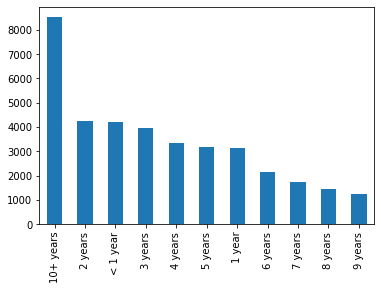

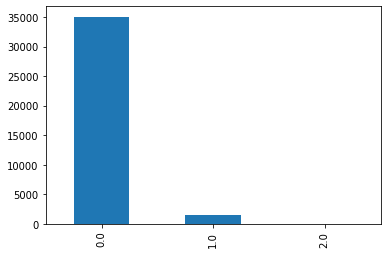

count    37143.000000
mean        49.155014
std         28.216397
min          0.000000
25%         26.000000
50%         49.700000
75%         72.600000
max         99.900000
Name: revol_util, dtype: float64

In [48]:
dfloan1.emp_length.value_counts().plot.bar()
plt.show()

dfloan1.pub_rec_bankruptcies.value_counts().plot.bar()
plt.show()

dfloan1.revol_util.str.replace('%','').astype(float).describe()

### It shows that employees having 10+ years of experience has applied for loans even  0 bankruptcies for most of the customers , revolving utilization contains 0.11 % null values  with standard deviation of 28. Hence for these null values can be removed


In [49]:
dfloan1= dfloan1[~dfloan1.emp_length.isnull()]
dfloan1 = dfloan1[~dfloan1.pub_rec_bankruptcies.isnull()]
dfloan1 = dfloan1[~dfloan1.revol_util.isnull()]


In [50]:
ColsOverview(dfloan1)

,colName,dtypes,Missingval,UniqueVal,TopVal
0,id,int64,0,36433,1052670
1,member_id,int64,0,36433,745584
2,loan_amnt,int64,0,863,10000
3,funded_amnt,int64,0,1024,10000
4,funded_amnt_inv,float64,0,7474,5000
5,term,object,0,2,36 months
6,int_rate,object,0,334,10.99%
7,installment,float64,0,14367,311.11
8,grade,object,0,7,B
9,sub_grade,object,0,35,B3


In [51]:
dfloan1.shape

(36433, 43)

## Now we have cleaned all the null values , lets take copy of dfloan1 to dfloan2 for further analysis

In [284]:
dfloan2 = dfloan1.copy()
dfloan2.shape

(36433, 43)

In [285]:
dfloan2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,13-Sep,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,15-Jan,357.48,16-Apr,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,11-Dec,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,16-May,67.79,16-May,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,11-Dec,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,4-Nov,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,15-Jan,161.03,16-Jan,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,11-Dec,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,0,5-Jul,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,16-May,1313.76,16-May,0.0


# Univariate Analysis

Univariate analysis on categorical parameters

In [286]:
# Defining a common function to plot graphs for univariate analysis

def plotUnivariate(dataFrameName, categorical_var, graphTitle, xLabel, yLabel, rotation, figsize_x, figsize_y):
    plt.figure(figsize=(figsize_x,figsize_y))
    sns.countplot(x=categorical_var, data=dataFrameName)    
    plt.title(graphTitle, fontsize=16)
    plt.ylabel(yLabel, fontsize=12)
    plt.xlabel(xLabel, fontsize=12)
    plt.xticks(rotation = rotation)
    plt.show();

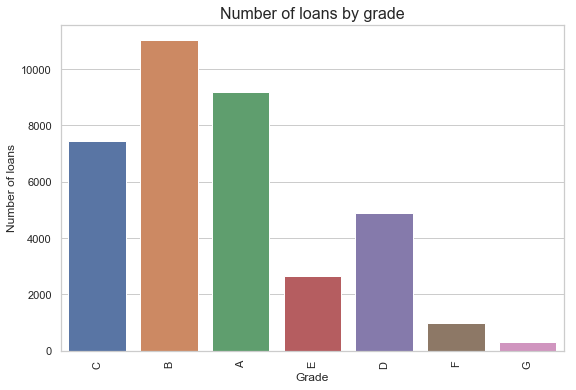

In [287]:
# Plotting grade against the number of loans

plotUnivariate(dfloan2, 'grade', 'Number of loans by grade', 'Grade', 'Number of loans', 90, 9, 6)



### The maximum number of loan applications are done by Grade B closely followed by Grade A and Grade C.
### The lowest number are loan applications are done by Grade G.
###  It can also be observed that as the Grade goes from A to G, the number of loan application goes down considerably.

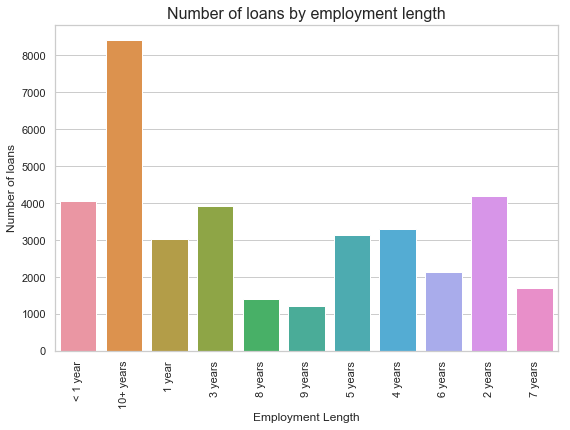

In [288]:
# Plotting grade against the number of loans

plotUnivariate(dfloan2, 'emp_length', 'Number of loans by employment length', 'Employment Length', 'Number of loans', 90, 9, 6)

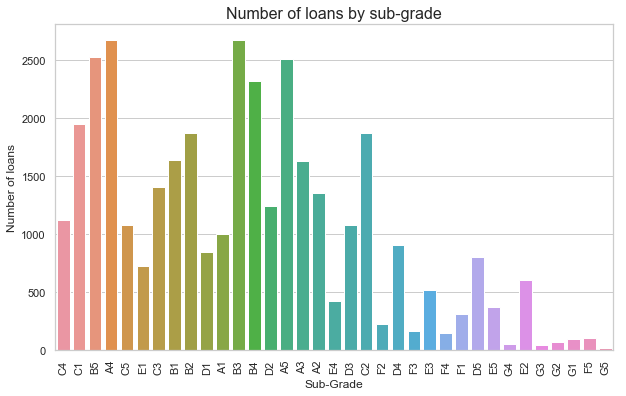

In [289]:
# Plotting sub-grade against the number of loans

plotUnivariate(dfloan2, 'sub_grade', 'Number of loans by sub-grade', 'Sub-Grade', 'Number of loans', 90, 10, 6)

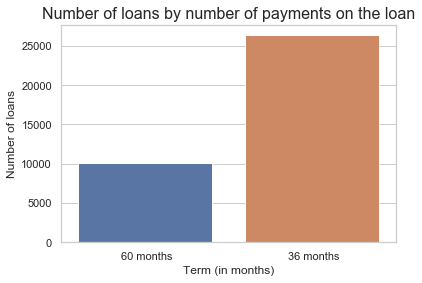

In [290]:
# Plotting term against the number of loans

plotUnivariate(dfloan2, 'term', 'Number of loans by number of payments on the loan', 'Term (in months)', 'Number of loans', 0, 6, 4)

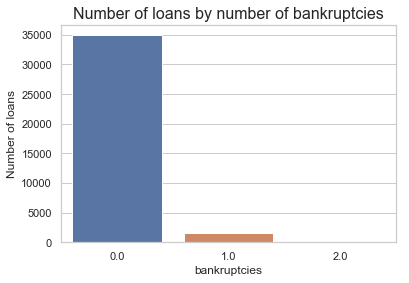

In [291]:
#plotting bankruptcies again loan
plotUnivariate(dfloan2, 'pub_rec_bankruptcies', 'Number of loans by number of bankruptcies', 'bankruptcies', 'Number of loans', 0, 6, 4)


### As we can see for most of the people has no  public bankruptcies records

In [292]:
def plotboxonevar(df, graphTitle, figsize_x, figsize_y ):
    plt.figure(figsize=[figsize_x,figsize_y])
    plt.title(graphTitle, fontsize=16)
    sns.set(style="whitegrid")
    ax = sns.boxplot(x=df )
    plt.show()

In [293]:
def snsdist(df, graphTitle, bins, figsize_x, figsize_y ):
    plt.figure(figsize=[8,6])
    plt.title(graphTitle, fontsize=16)
    sns.distplot(df ,norm_hist=False,kde=False,  bins= bins ,hist_kws={"alpha": 1} ).set( ylabel='Count');
    plt.show()
    

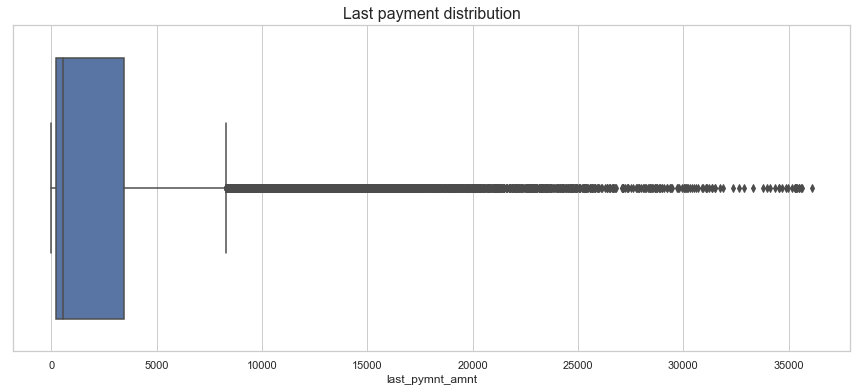

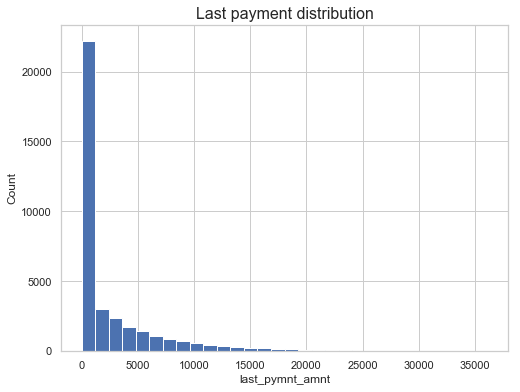

count    36433.000000
mean      2742.955476
std       4473.528922
min          0.010000
25%        226.280000
50%        571.700000
75%       3457.580000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64

In [294]:
# checking the distribution of last payment 
plotboxonevar(dfloan2["last_pymnt_amnt"] , 'Last payment distribution', 15 , 6)
snsdist(dfloan2["last_pymnt_amnt"] , 'Last payment distribution', 30,  6 , 4)
dfloan2["last_pymnt_amnt"].describe()

#### As we can most of the people tends to pay less amount , 75% values beyond 3457 and max value is 36k.

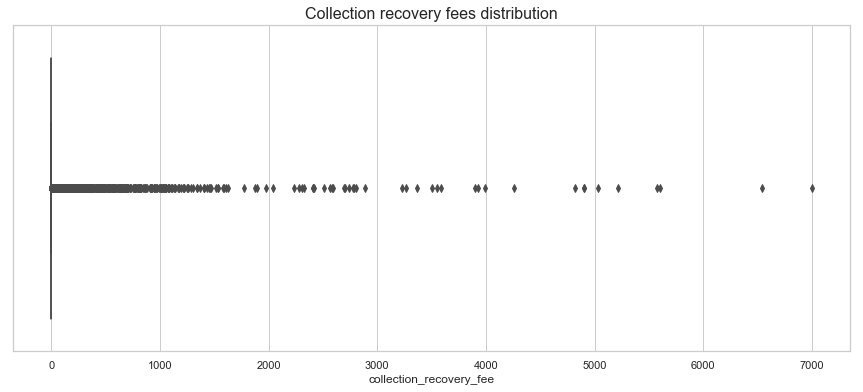

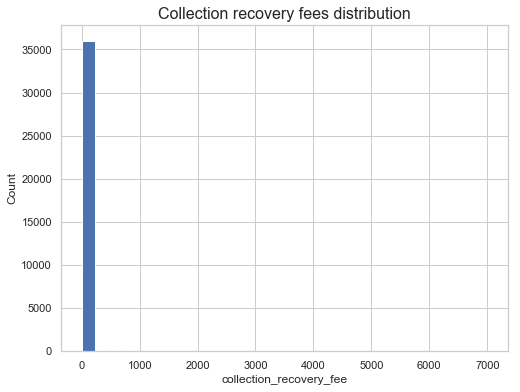

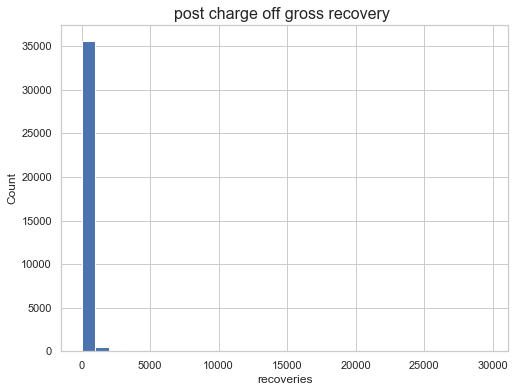

,collection_recovery_fee,recoveries
count,36433.000000,36433.000000
mean,11.677065,92.855490
std,140.880327,682.047187
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,7002.190000,29623.350000


In [295]:
#checking collection recovery fees distribution 
plotboxonevar(dfloan2["collection_recovery_fee" ] , 'Collection recovery fees distribution', 15 , 6)
snsdist(dfloan2["collection_recovery_fee"] , 'Collection recovery fees distribution', 30,  6 , 4)
dfloan2["collection_recovery_fee"].describe()
snsdist(dfloan2["recoveries"] , 'post charge off gross recovery ', 30,  6 , 4)
dfloan2[["collection_recovery_fee","recoveries" ]].describe()


#### In most of the loan there is no recovery  or may be we can say not required , further analysis could be done in segmented  univariate for charged off loans

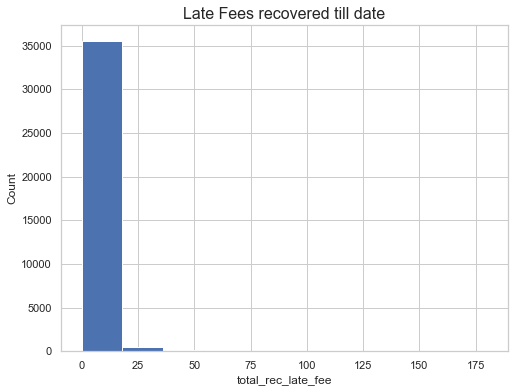

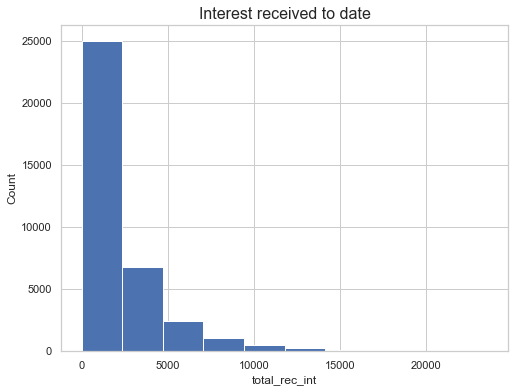

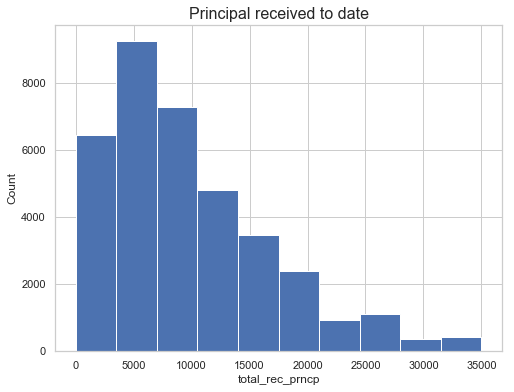

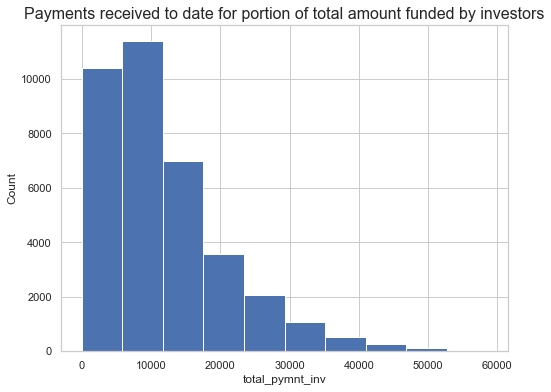

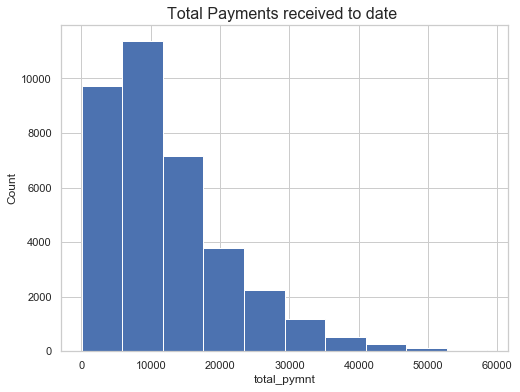

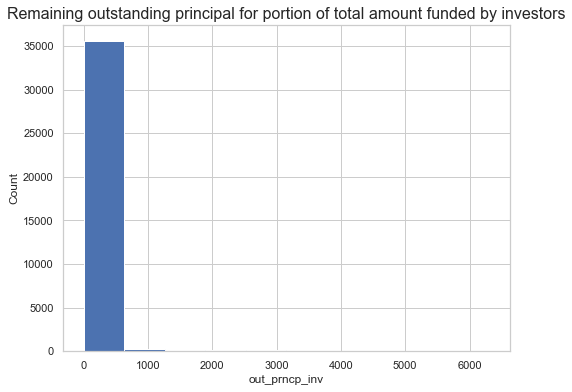

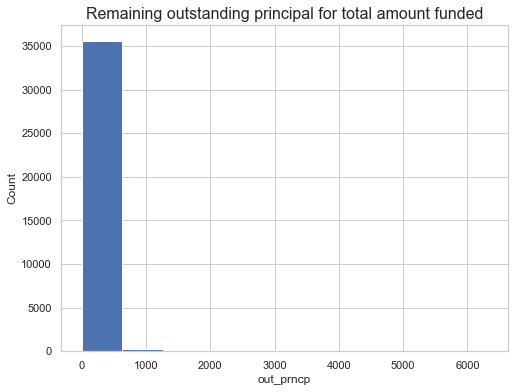

,total_rec_late_fee,total_rec_int,total_rec_prncp,total_pymnt_inv,total_pymnt,out_prncp_inv,out_prncp
count,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000
mean,1.299840,2304.404937,9912.408471,11841.070656,12310.968657,52.213313,52.465692
std,7.065629,2629.542911,7053.212865,8911.319070,9048.420885,378.443825,379.850844
min,0.000000,6.220000,0.000000,0.000000,33.730000,0.000000,0.000000
25%,0.000000,678.010000,4800.000000,5413.410000,5672.557913,0.000000,0.000000
50%,0.000000,1379.820000,8123.600000,9632.040000,10101.589360,0.000000,0.000000
75%,0.000000,2891.860000,14000.000000,16094.490000,16700.719980,0.000000,0.000000
max,180.200000,23563.680000,35000.020000,58563.680000,58563.679930,6307.370000,6311.470000


In [296]:
# Analysing total recovery late fees 
snsdist(dfloan2["total_rec_late_fee"] , 'Late Fees recovered till date', 10,  6 , 4)
snsdist(dfloan2["total_rec_int"] , 'Interest received to date', 10,  6 , 4)
snsdist(dfloan2["total_rec_prncp"] , 'Principal received to date', 10,  6 , 4)
snsdist(dfloan2["total_pymnt_inv"] , 'Payments received to date for portion of total amount funded by investors', 10,  6 , 4)
snsdist(dfloan2["total_pymnt"] , 'Total Payments received to date ', 10,  6 , 4)
snsdist(dfloan2["out_prncp_inv"] , 'Remaining outstanding principal for portion of total amount funded by investors', 10,  6 , 4)
snsdist(dfloan2["out_prncp"] , 'Remaining outstanding principal for total amount funded', 10,  6 , 4)

dfloan2[["total_rec_late_fee" , "total_rec_int" ,"total_rec_prncp","total_pymnt_inv","total_pymnt" ,"out_prncp_inv" , "out_prncp"]].describe()

### Insights for Univariate
   - for 75% of loan customers there is no late fees. further analysis can be done on segmented univairate
   - for 75% customers interest received is less than 2900 , huge variation bw median and mean
   - principal received , total payment and payment portion for investers seems to be normally distributed . Hence most of the       money has been recovered  , more information to be checked for segmented
   - Around 75% loan customers has no outstanding balance  and mean outstanding balance is around 52 dollars.

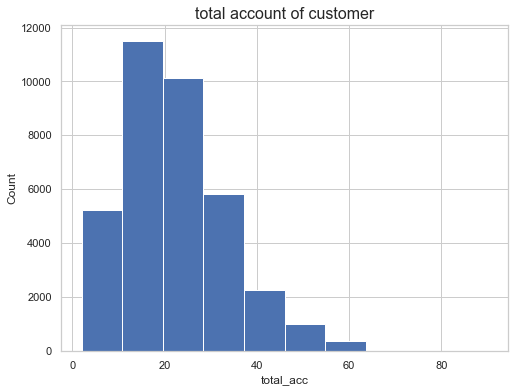

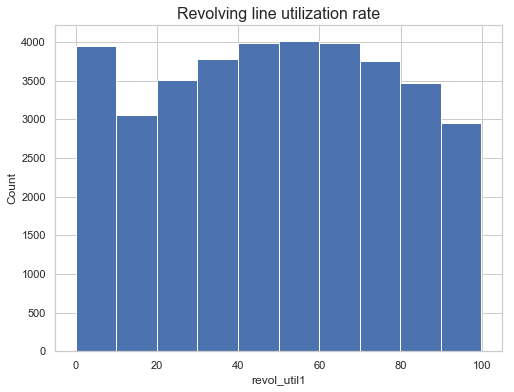

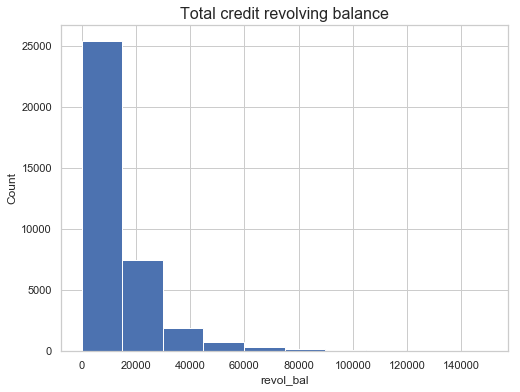

,total_acc,revol_util1,revol_bal
count,36433.000000,36433.000000,36433.000000
mean,22.245876,49.276251,13465.657481
std,11.376692,28.191811,15702.093047
min,2.000000,0.000000,0.000000
25%,14.000000,26.100000,3832.000000
50%,21.000000,49.900000,9030.000000
75%,29.000000,72.700000,17231.000000
max,90.000000,99.900000,149588.000000


In [300]:
# Analyzing the total account and revolving utilization
snsdist(dfloan2["total_acc"] , 'total account of customer', 10,  6 , 4)
#converting revol_util to float 
dfloan2['revol_util1'] =dfloan2['revol_util'].str.replace('%','').astype(float)
snsdist(dfloan2['revol_util1'] , 'Revolving line utilization rate', 10,  6 , 4)
snsdist(dfloan2['revol_bal'] , 'Total credit revolving balance', 10,  6 , 4)

dfloan2[['total_acc', 'revol_util1' , 'revol_bal']].describe()


###  Univariate Insights on total account and revolving utilization
   - Average loan customers have around 21 to 22 total accounts 
   - Most of the cusotmers have revolving balance utilization of around 49% . as we know lesser the utilization , better will        be credit score
   - 75% customers has revolving balance less than 17232 and there is huge difference be mean and median
    

,pub_rec,open_acc,inq_last_6mths,delinq_2yrs
count,36433.000000,36433.000000,36433.00000,36433.000000
mean,0.053715,9.351604,0.86493,0.146131
std,0.234995,4.373772,1.06343,0.492199
min,0.000000,2.000000,0.00000,0.000000
25%,0.000000,6.000000,0.00000,0.000000
50%,0.000000,9.000000,1.00000,0.000000
75%,0.000000,12.000000,1.00000,0.000000
max,4.000000,44.000000,8.00000,11.000000


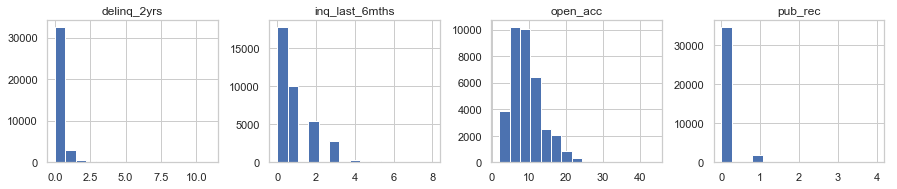

In [309]:
#analyzing below columns
dfloan2[['pub_rec' ,'open_acc','inq_last_6mths' ,'earliest_cr_line', 'delinq_2yrs' ]].hist(bins=15, figsize=(15, 6), layout=(2, 4));
dfloan2[['pub_rec' ,'open_acc','inq_last_6mths' ,'earliest_cr_line', 'delinq_2yrs' ]].describe()

### Univariate Analysis Insights  on public Records , open accounts, credit inquiries , delinq
   - Most of the loan customers has no public derogatory records 
   - 50% people has open accounts b/w 6 to 12  , with average and median of 9 accounts
   - 75 % people has no credit enquiries in last 6 months
   - in past 2 years most of the loan customers has no delinquency Avergae os 0.14 and max is 11 . 

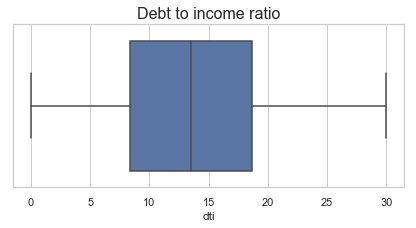

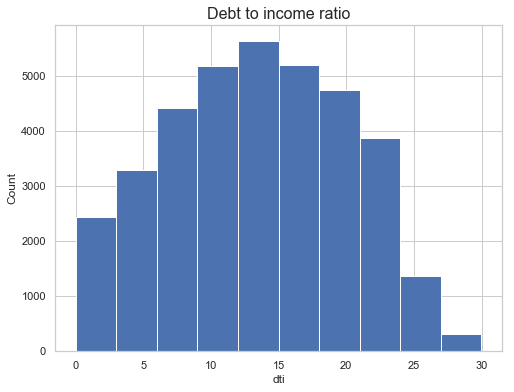

,dti
count,36433.000000
mean,13.444131
std,6.643308
min,0.000000
25%,8.360000
50%,13.540000
75%,18.690000
max,29.990000


In [320]:
# Analyzing the important column Debt to income ratio dti 
plotboxonevar(dfloan2["dti"] , 'Debt to income ratio',7 , 3)
snsdist(dfloan2['dti'] , 'Debt to income ratio', 10,  7 , 3)
dfloan2[['dti']].describe()

### Debt to income ratio is normally distributed . 75% loan customer have dti less than 19%

# Driver analysis
-  As we know that our objective is to find out the main drivers  which provide strong indication of deafulting a loan    
   application.
-  we can see that there different categories of columns related to loan applicant  like its name age , employment etc then     
   related to loan like loan amount , installement rate , grade , subgrade etc . and columns post loan is assigned like 
   recoveries , toal payment received , last payment date etc.
-  post assigned loan columns can be excluded now from the analysis as these will not help in predicting the default loan

   

In [326]:
# we can see below are the post assigned columns excluding id and member id also as these columns are unique 
postassignedloancols = [
'id',
'member_id',
'out_prncp',
'out_prncp_inv',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'last_pymnt_d',
'last_pymnt_amnt',
'last_credit_pull_d',
'inq_last_6mths',
'delinq_2yrs',
]
dfloan3 = dfloan2.loc[:,~dfloan2.columns.isin(postassignedloancols)]


In [327]:
ColsOverview(dfloan3)

,colName,dtypes,Missingval,UniqueVal,TopVal
0,loan_amnt,int64,0,863,10000
1,funded_amnt,int64,0,1024,10000
2,funded_amnt_inv,float64,0,7474,5000
3,term,object,0,2,36 months
4,int_rate,object,0,334,10.99%
5,installment,float64,0,14367,311.11
6,grade,object,0,7,B
7,sub_grade,object,0,35,B3
8,emp_title,object,0,28207,US Army
9,emp_length,object,0,11,10+ years


In [329]:
#There are 3 categories of loan status
dfloan3.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [331]:
# Current loan status can be excluded from analysis as it will not add any value as user is still availing loan 
# we will be analyzing either fully paid loans or default loans .
dfloan3 = dfloan3[dfloan3.loan_status!='Current']
dfloan3.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64

In [335]:
#Converting fully paid and charged off to 0 and 1
dfloan3.loan_status = dfloan3.loan_status.apply(lambda x : int(0) if x=='Fully Paid' else int(1))
#checking the default percentage 


count    35367.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: loan_status, dtype: float64